**Click on File and save a copy in Drive.**

### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [ ]:
! pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=cddb18f0f41178b18d40d55186b988e7b3a6a540ce45004394f8bee32343e85c
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
y

array([-126.24922409,   50.92876904,   63.15463302,    6.05472009,
         -5.72954025,   -2.75191769,   58.70355923,   53.81362958,
        -95.34105851,   24.64812471,  -59.41697406,  -73.42349619,
       -104.16266749,   31.80766772,  171.15350154,  -67.75196497,
        141.46769811,  -24.36756973,   -2.11240097,  -32.59583109,
        -29.41505819,  -37.87145989, -101.89829601,   46.41287784,
       -181.34840044,  -31.77399504,   24.13154879,  163.94385144,
         10.77367111,   37.35891532,    0.98036703, -120.88573188,
        138.19938797,    9.20267903,  -16.2068899 ,   33.21708479,
        -45.61698488,   -1.77758908, -105.56283971,    5.26394625,
         89.5978923 ,  146.10300439,  -77.78704394,   -3.80893607,
         60.81195812,  -97.2027103 ,   -1.15989334,  -43.88245964,
         15.74278405,  -24.27446551,  -90.60148118,  -19.07314539,
       -101.79001521,  -56.55140067,   52.1696979 , -158.28468928,
         64.53968736,   84.52102913,   66.43434451,   36.86598

### Visualizing the data  
Use `matplotlib` to visualize the given data.

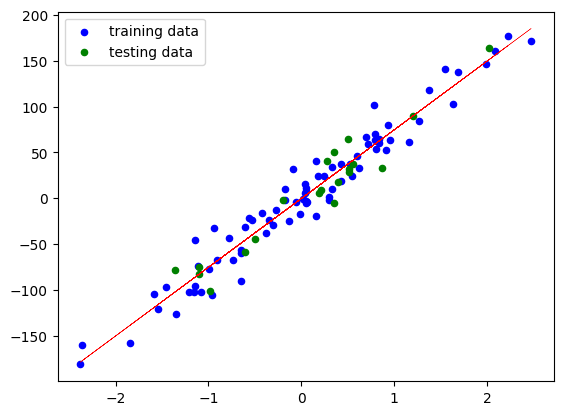

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X_train,y_train,s=20,c='b',label="training data")
ax1.scatter(X_test,y_test,s=20,c='g',label="testing data")
plt.legend(loc="upper left")
regressor = LinearRegression()
regressor.fit(X,y)
y_pred = regressor.predict(X)
plt.plot(X,y_pred,color="red",linewidth="0.3")
plt.show()


You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (xw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x(y_i -(m  x +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [ ]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.001, n_iters=1000):
        # Your code here
        self.current_W = 0.1
        self.current_b = 0.01
        self.learning_rate = 0.1
        self.n_iters = 1000

    # The following function would be the heart of the model. This is where the training would happen.
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
        # Gradient Descent code goes here
        n_iters = 1000
        learning_rate = 0.001
        n = float(len(X))
        costs = []
        weights = []
        previous_cost = None
        tol = 1e-6
        X = X.astype(float)

        for i in range(n_iters):
                 a = np.multiply(np.array(X),self.current_W)
                 y_predicted = a + self.current_b
                 current_cost = np.sum((y-y_predicted)**2) / len(y)
                 if previous_cost and abs(previous_cost-current_cost) <= tol:
                   break
                 previous_cost = current_cost
                 costs.append(current_cost)
                 weights.append(self.current_W)
                 weight_derivative = -(2/n) * np.sum(np.multiply(X,(y - y_predicted)))
                 bias_derivative = -(2/n) * np.sum(y - y_predicted)
                 self.current_W = self.current_W - (learning_rate * weight_derivative)
                 self.current_b = self.current_b - (learning_rate * bias_derivative)


    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X=[],y=[]):
        y = np.array(y)
        d = np.multiply(np.array(X),self.current_W)
        Y_pred = d + self.current_b
        h = Y_pred
        n = h.sum(axis=1)
        return  n


### Initializing, Training & Predictions

In [ ]:
# Now, we make an object of our custom class.
regress = LinearRegression()
# Call the fit method on the object to train (pass appropriate part of dataset)
regress.__init__
regress.fit(X_train,y_train)
regress.predict(X_train)

# Now, let's see our what our model predicts
# pass appropriate part of dataset


array([1.19528812, 1.1952873 , 1.19530162, 1.19533524, 1.19529412,
       1.19536834, 1.19525891, 1.19528072, 1.19534528, 1.19528256,
       1.19528297, 1.19531396, 1.19525566, 1.19529061, 1.195331  ,
       1.19527435, 1.19523605, 1.19531256, 1.19531699, 1.19526035,
       1.19526639, 1.19529287, 1.19531229, 1.19531391, 1.19523568,
       1.19530947, 1.19532677, 1.19523619, 1.19535918, 1.19534179,
       1.19522396, 1.19526919, 1.19525723, 1.19520884, 1.19529797,
       1.19522053, 1.19527024, 1.19528299, 1.19523888, 1.1953475 ,
       1.19523364, 1.19527763, 1.19524555, 1.19527595, 1.19528289,
       1.19528183, 1.19529776, 1.19537828, 1.19528322, 1.1952189 ,
       1.19524402, 1.19531855, 1.19528249, 1.1952282 , 1.19523741,
       1.19518854, 1.19536302, 1.19526467, 1.19527421, 1.19529412,
       1.19525553, 1.19530536, 1.19528736, 1.19531195, 1.19531776,
       1.1953083 , 1.195242  , 1.19528373, 1.19527894, 1.19529274,
       1.19530237, 1.19530457, 1.1952675 , 1.19525235, 1.19518

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [ ]:
def mean_squared_error(y_true, y_pred):
    mse = np.sum((y_true - y_pred)**2)/len(y_true)
    return mse

def r2_score(y_true, y_pred):
    y_mean = np.sum(y_true)/len(y_true)
    r2_score = 1 - np.sum((y_true - y_pred)**2)/np.sum((y_true - y_mean)**2)
    return r2_score

y_pred = regress.predict(X)
mse = mean_squared_error(y,y_pred)
print("MSE:", mse)

accu =  r2_score(y,y_pred)
print("Accuracy:", accu)

MSE: 290.2612417801377
Accuracy: 0.9482150605235175


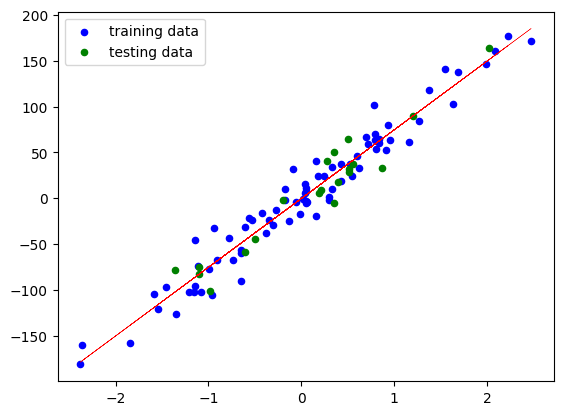

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X_train,y_train,s=20,c='b',label="training data")
ax1.scatter(X_test,y_test,s=20,c='g',label="testing data")
plt.legend(loc="upper left")
regressor = LinearRegression()
regressor.fit(X,y)
y_pred = regressor.predict(X)
plt.plot(X,y_pred,color="red",linewidth="0.3")
plt.show()


[Please click on this link to access subjective questions](https://docs.google.com/document/d/1ty9m1vUoPNh_WU8qATznTKukukkSwOlnLJazhBFmWO4/edit?usp=sharing)